Github Repository Link: https://github.com/DStull99/MSCS-Boulder-Machine-Learning-Final-Projects/tree/main

Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Importing the dataset 
df = pd.read_csv('Country-data.csv')
column_info = pd.read_csv('data-dictionary.csv')

In [72]:
# Inspecting the dataset 
print(df.isna().sum())
print(df.info())
df.head()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [73]:
# Inspecting the column info from the data dictionary:
pd.set_option('display.max_colwidth', None)
column_info.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


C:\Users\dstull\AppData\Local\Temp\ipykernel_20904\3440513395.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


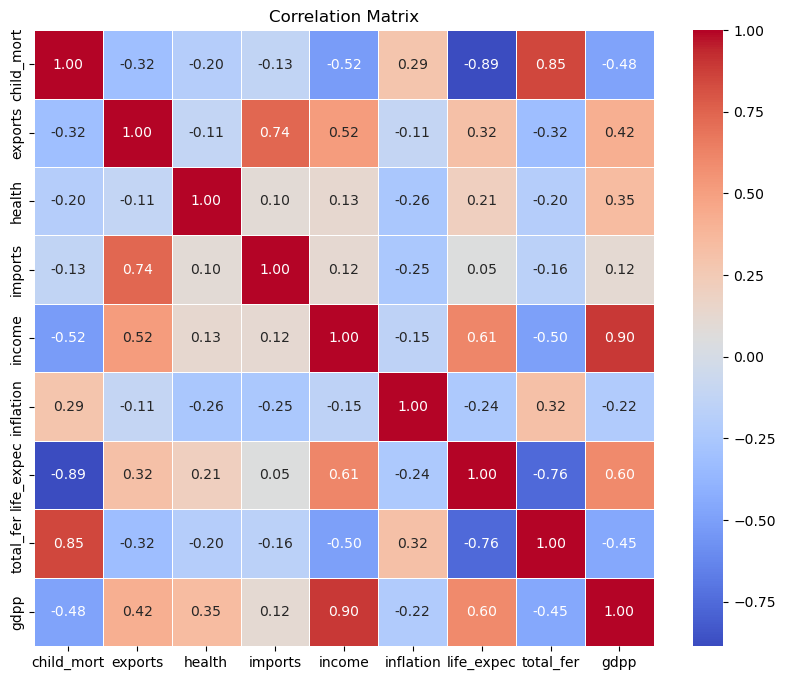

In [74]:
# Inspecting the Correlation Matrix for the dataset:

corr_mat = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_mat, 
            annot=True,        #
            cmap='coolwarm',   
            fmt=".2f",         
            linewidths=0.5)    

plt.title("Correlation Matrix")
plt.show()

In [75]:
# Standardizing the Features in the dataset:
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number'])
numeric_scaled = scaler.fit_transform(numeric_columns)


Text(0.5, 1.0, 'Elbow Method')

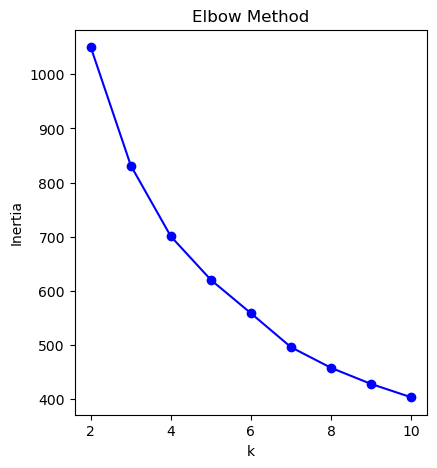

In [76]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42, init='k-means++')
    kmeans.fit(numeric_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', color='blue')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42, init='k-means++')
kmeans.fit(numeric_scaled)
df['Cluster'] = kmeans.labels_

In [78]:
# Inspecting countries that fall into each cluster 
print(f"Cluster 0 countries: {df[df['Cluster']==0].country.values}\n")
print(f"Cluster 1 countries: {df[df['Cluster']==1].country.values}\n")
print(f"Cluster 2 countries: {df[df['Cluster']==2].country.values}\n")

Cluster 0 countries: ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']

Cluster 1 countries: ['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']

Cluster 2 cou

In [79]:
# Inspecting statistics of cluster 0
df[df['Cluster']==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444,0.0
std,2.188933,41.930782,3.178015,36.843998,20852.017526,4.077719,1.815742,0.373054,18991.079777,0.0
min,2.600000,12.400000,1.810000,13.600000,25200.000000,-3.220000,75.500000,1.150000,16600.000000,0.0
25%,3.550000,29.700000,7.735000,28.400000,32450.000000,0.451500,79.500000,1.437500,30675.000000,0.0
50%,4.200000,50.350000,9.445000,39.050000,40550.000000,1.190000,80.350000,1.815000,41200.000000,0.0
75%,5.750000,67.925000,10.775000,62.900000,46625.000000,3.647500,81.400000,1.957500,48475.000000,0.0
max,10.800000,200.000000,17.900000,174.000000,125000.000000,16.700000,82.800000,3.030000,105000.000000,0.0


In [80]:
# Inspecting statistics of cluster 1 
df[df['Cluster']==1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,1.0
std,33.375229,18.160597,2.662015,17.732741,5641.790360,15.509958,6.443521,1.041382,2956.103925,0.0
min,36.900000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0
25%,63.800000,16.950000,4.520000,29.800000,1390.000000,4.010000,56.650000,4.535000,550.000000,1.0
50%,90.200000,23.800000,5.660000,40.300000,1870.000000,8.920000,59.500000,5.060000,897.000000,1.0
75%,111.000000,38.200000,8.105000,49.450000,3675.000000,16.600000,62.850000,5.635000,1470.000000,1.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0


In [81]:
# Inspecting statistics of cluster 2 
df[df['Cluster']==2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381,2.0
std,13.757919,19.029182,2.167233,20.103873,8180.073696,7.849516,3.960745,0.696957,5021.434052,0.0
min,4.500000,0.109000,1.970000,0.065900,1780.000000,-4.210000,61.700000,1.250000,592.000000,2.0
25%,11.650000,26.750000,4.855000,32.150000,6635.000000,2.367500,70.200000,1.750000,2967.500000,2.0
50%,18.350000,37.300000,5.930000,48.650000,10180.000000,5.805000,73.600000,2.235000,4670.000000,2.0
75%,28.350000,51.400000,7.362500,60.425000,16650.000000,10.025000,76.100000,2.662500,9070.000000,2.0
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,2.0


Based on the results, it appears that the 3 clusters correspond to the following buckets:

    - Cluster 0: These would be classified as "Highly Developed Countries". Countries such as the UK, US, UAE, Switzerland, South Korea, etc. are within this cluster. The countries within this cluster have high GDP, high income, low child mortality rates, longer life expectancies, etc. The countries within this cluster have the lowest need for assistance.

    - Cluster 1: These would be classified as "Less Developed Countries". Countries such as Afghanistan, Iraq, Equitorial Guinea, Pakistan, etc. are within this cluster. The countries within this cluster have low GDP, low income, high child mortality rates, lower life expectancies, etc. The countries within this cluster have the greatest need for assistance.

    - Cluster 2: These would be classified as "Well-Developed Countries". Countries such as Ukraine, Turkey, Egypt, China, Guatemala, etc. are within this cluster. The countries within this cluster are generally between Cluster 0 and Cluster 2 in terms of GDP, income, child mortality rates, life expectancy, etc. Some of the countries within this cluster may have need for assistance, but less so than the countries in cluster 1.

With this in mind, given that HELP International is constrained to $10M, it's likely that the most optimal usage of these resources would be to assist the countries in Cluster 1. Given that $10M is a small sum on the scale of countries, HELP would likely have to further analyze the countries in Cluster 1 to determine which countries should receive monetary aid. It would also be helpful to gather data on the current state of these countries, e.g., if war has broken out or if an extreme national disaster has struck. 